Per il riconoscimento facciale abbiamo bisogno di seguire i passi indicati nel paper firmato da Turk e Pentland:
- Aquisire un dataset di facce
- Calcolare le eigenfaces dal set di apprendimento conservando solo le M immagini che hanno gli autovalori più alti. Queste M facce rappresentano lo spazio delle facce, questo spazio può essere man mano aggiornato
- Calcolare la distribuzione M dimensionale per ogni individuo proiettando la faccia sullo spazio delle facce

Una volta inizializzato il sistema, possiamo procedere in questo modo:
- Calcolare un set di pesi in base all'immagine fornita e gli autovalori proiettando l'immagine su ogni eigenfaces 
- Determinare se l'immagine è effettivamente un volto controllando che sia abbastanza vicino allo spazio delle facce
- Calcolare i pesi in modo da definire se è una persona che è già segnata o meno
- Opzionalmente si possono aggiornare pesi e spazio delle facce 

In [3]:
import os
import glob 
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pickle
#import pandas as pd
#import math
#from PIL import Image



In [4]:
dim = 64

faces_xml = 'haarcascade_frontalface_alt.xml'
#eyes_xml = 'haarcascade_eye.xml'
face_cascade = cv2.CascadeClassifier()
#eyes_cascade = cv2.CascadeClassifier()
if not face_cascade.load(faces_xml):
    print('--(!)Errore durante il caricamento del file xml per le facce')
    exit(0)


#if not eyes_cascade.load(eyes_xml):
#    print('--(!)Error loading eyes cascade')
#    exit(0)

root = "foto64x64"
cwd = os.getcwd()
listDir = os.listdir(root)
tagFoto = {}

for dir in listDir:
    imgs =  glob.glob(f"{root}/{dir}/*.jpg")
    tagFoto[dir] = imgs


In [5]:
def normalize(matrix):
    normalizedData = (matrix-np.min(matrix))/(np.max(matrix)-np.min(matrix))
    return normalizedData

In [6]:
def violajones(im):
    img = cv2.imread(im,0)
    faceROI = np.zeros((dim,dim), dtype=np.float32)
    faces = face_cascade.detectMultiScale(img)
    for (x, y, w, h) in faces:
        faceROI = img[y:y + h, x:x + w]
        faceROI = cv2.resize(faceROI,(dim,dim), interpolation=cv2.INTER_LINEAR)
        #faceROI = preprocess(faceROI)
        
    return faceROI

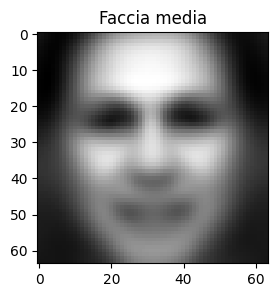

In [7]:
faceMean = np.zeros((dim,dim), dtype=np.float32)
faceNumber = 0
listOfArray = []
faceLabel = []

for key in tagFoto:
    for im in tagFoto[key]:
        vj = violajones(im)
        faceMean += vj
        flat = vj.flat
        listOfArray.append(flat)
        faceLabel.append(key)
        faceNumber+=1

faceMean /= faceNumber

MatrixFlattenedImages = np.vstack(listOfArray)  

MatrixFlattenedImages = normalize(MatrixFlattenedImages)

fig, axes = plt.subplots(1,1,sharex=True,sharey=True,figsize=(3,3))
axes.imshow(faceMean, cmap="gray")
axes.set_title("Faccia media")
plt.show()

Decommentare solo per rifare il training del modello

In [8]:
pca = PCA().fit(MatrixFlattenedImages)


with open('pca.pkl', 'wb') as pickle_file:
    pickle.dump(pca, pickle_file)

In [9]:
with open('pca.pkl', 'rb') as pickle_file:
    pca = pickle.load(pickle_file)


varianzaCumulata = pca.explained_variance_ratio_.cumsum()

index95 = list(map(lambda i: i> 0.95, varianzaCumulata)).index(True)

index9999 = list(map(lambda i: i> 0.9999, varianzaCumulata)).index(True)

print(f"numero di componenti per avere il 95%  \t{index95} \nnumero di componenti per avere il 99,99% {index9999} ")

eigenfaces95perc = pca.components_[:index95]
eigenfaces9999perc = pca.components_[:index9999]

eigenfaces = pca.components_

weights = eigenfaces @ (MatrixFlattenedImages - pca.mean_).T
weights95 = eigenfaces95perc @ (MatrixFlattenedImages - pca.mean_).T
weights9999 = eigenfaces9999perc @ (MatrixFlattenedImages - pca.mean_).T


numero di componenti per avere il 95%  	34 
numero di componenti per avere il 99,99% 1342 


In [31]:
root = "galleria"
listDirGalleria = os.listdir(root)
tagFotoGalleria = {}

for dir in listDirGalleria:
    imgs =  glob.glob(f"{root}/{dir}/*.jpg")
    tagFotoGalleria[dir] = imgs
galleria = []
labelGalleria = []
listOfGalleria = []

for key in tagFotoGalleria:
    for im in tagFotoGalleria[key]:
        img = cv2.imread(im,0)
        img = img.reshape(1,-1)
        listOfGalleria.append(img)
        labelGalleria.append(key)
        
MatrixFlattenedGallery = np.vstack(listOfGalleria)
MatrixFlattenedGallery = normalize(MatrixFlattenedGallery)
for l in labelGalleria:
    print(l)

Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi
Davide_Sgroi

In [29]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(MatrixFlattenedGallery,labelGalleria)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(MatrixFlattenedGallery,labelGalleria)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(MatrixFlattenedGallery,labelGalleria)

KNeighborsClassifier()

In [30]:
def knnPredict(query):
    predict1 = knn1.predict(query)
    predict3 = knn3.predict(query)    
    predict5 = knn5.predict(query)

    return predict1, predict3, predict5


In [32]:
vj = violajones("test/0.jpg") 
vj = normalize(vj)   
query = vj.reshape(1,-1)



query_weight = eigenfaces @ (query - pca.mean_).T
query_weight = query_weight.reshape(1,-1)
knn100 = knnPredict(query_weight)
for k in knn100:
    print(k)

#query_weight95 = eigenfaces95perc @ (query - pca.mean_).T
#print((query_weight95.reshape(1,-1)).shape)
#print(f"\n {knnPredict(query_weight95.reshape(1,-1))}")


#query_weight9999 = eigenfaces9999perc @ (query - pca.mean_).T
#print(f"\n {knnPredict(query_weight9999.reshape(1,-1))}")



['Gabriele_Musso']
['Gabriele_Musso']
['Gabriele_Musso']


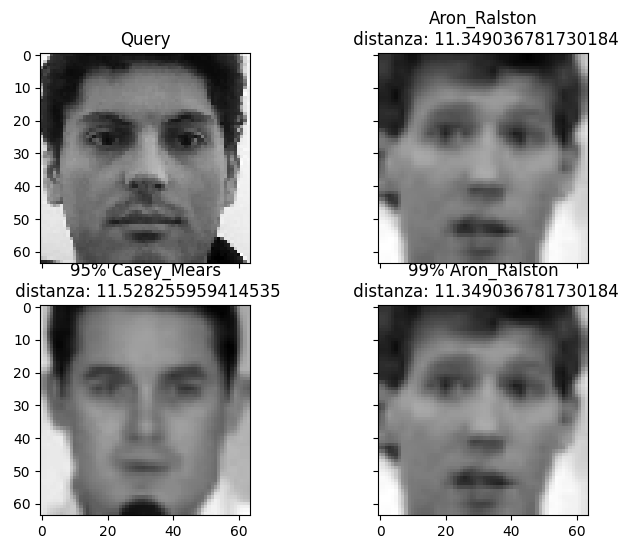

In [16]:
vj = violajones("test/0.jpg") 
vj = normalize(vj)   
query = vj.reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)

query_weight95 = eigenfaces95perc @ (query - pca.mean_).T
euclidean_distance95 = np.linalg.norm(weights95 - query_weight95, axis=0)

query_weight9999 = eigenfaces9999perc @ (query - pca.mean_).T
euclidean_distance9999 = np.linalg.norm(weights9999 - query_weight9999, axis=0)

best_match = np.argmin(euclidean_distance)

best_match95 = np.argmin(euclidean_distance95)

best_match9999 = np.argmin(euclidean_distance9999)

fig, axes = plt.subplots(2,2,sharex=True,sharey=True,figsize=(8,6))
axes[0][0].imshow(query.reshape(dim,dim), cmap="gray")
axes[0][0].set_title(f"Query")
axes[0][1].imshow(MatrixFlattenedImages[best_match].reshape(dim,dim), cmap="gray")
axes[0][1].set_title(f"{faceLabel[best_match]}\n distanza: {euclidean_distance[best_match]}")

axes[1][0].imshow(MatrixFlattenedImages[best_match95].reshape(dim,dim), cmap="gray")
axes[1][0].set_title(f"\n95% {faceLabel[best_match95]}\n distanza: {euclidean_distance[best_match95]}")
axes[1][1].imshow(MatrixFlattenedImages[best_match9999].reshape(dim,dim), cmap="gray")
axes[1][1].set_title(f"\n99% {faceLabel[best_match9999]}\n distanza: {euclidean_distance[best_match9999]}")


plt.show()




In [24]:
def violajonesMultiple(img, minNeighbors=5):
    faceROI = np.zeros((dim,dim), dtype=np.float32)
    faces = face_cascade.detectMultiScale(img,minNeighbors=minNeighbors, minSize = (10,10), maxSize=(50,50))
    listOfFaceROI = []
    pos =[]
    for (x, y, w, h) in faces:
        faceROI = img[y:y + h, x:x + w]
        faceROI = normalize(cv2.resize(faceROI,(dim,dim), interpolation=cv2.INTER_LINEAR))
        listOfFaceROI.append(faceROI)
        pos.append([(x, y), (x+w, y+h), (255, 0, 255), 4])
    return listOfFaceROI, pos

def findCorrespondence(frame, printMatplot=False, printCorrespondence=False):
    font = cv2.FONT_HERSHEY_SIMPLEX
    faceNumber = 0
    frameFaceLabel = []
    vjMul, pos = violajonesMultiple(frame)
    #print(f"trovati {len(vjMul)} volti nel frame")
    for vj in vjMul:
        vj = normalize(vj)
        query = vj.reshape(1,-1)
        query_weight = eigenfaces @ (query - pca.mean_).T
        #cambiare qui con knn
        best_match = knn5.predict(query_weight.reshape(1,-1))
        frameFaceLabel.append(best_match[0])
        if printCorrespondence:
            print(f"Approssimazione migliore {best_match}  \n Distanza euclidea {euclidean_distance[best_match]} ")
        if printMatplot: 
            fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
            axes[0].imshow(query.reshape(dim,dim), cmap="gray")
            axes[0].set_title("Query")
            axes[1].imshow(MatrixFlattenedImages[best_match].reshape(dim,dim), cmap="gray")
            axes[1].set_title(f"{faceLabel[best_match]}\n distanza: {euclidean_distance[best_match]}")
            plt.show()
    for p in pos:
        px,py = p[0]
        frame = cv2.putText(frame, frameFaceLabel[faceNumber], (px-5,py-5) ,font, 1,(255,255,255),2 )
        faceNumber+=1
        frame = cv2.rectangle(frame, p[0],p[1],p[2],p[3])
    #cv2.imshow("face detect", frame)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    return frame




In [36]:
img = cv2.imread("test/0.jpg",0)

findCorrespondence(img,printMatplot=True,printCorrespondence=True)

array([[186, 185, 187, ..., 176, 177, 178],
       [186, 185, 186, ..., 176, 176, 175],
       [187, 187, 188, ..., 177, 176, 175],
       ...,
       [170, 170, 171, ..., 175, 175, 175],
       [170, 170, 171, ..., 175, 176, 175],
       [170, 170, 171, ..., 175, 176, 175]], dtype=uint8)

In [25]:
#Da decommentare in caso in cui bisogna rifare la raccolta delle facce nei video o dopo aver ricreato 
#il set dell'addestramento

#'''
video = cv2.VideoCapture("Video finale senza riconoscimento.mp4")
frames = []
if (video.isOpened()== False):
    print("Error opening video file")
while(video.isOpened()):
  ret, frame = video.read()
  if ret == True:
        frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))
  else:
      break

print("finito di raccogliere i frame")
riconosciuti=[]
for f in frames:
    riconosciuti.append(findCorrespondence(f))
print("finito di riconoscere")
with open('Riconosciuto.pkl', 'wb') as pickle_file:
        pickle.dump(riconosciuti, pickle_file)
#'''


finito di raccogliere i frame
finito di riconoscere


In [26]:
#da fixare
with open('Riconosciuto.pkl', 'rb') as pickle_file:
    riconosciuti = pickle.load(pickle_file)
height, width = riconosciuti[0].shape
size = (width,height)

#fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fourcc = -1 

out30 = cv2.VideoWriter('project30fps.mp4',fourcc, 30, size)

for i in riconosciuti:
    out30.write(i)
out30.release()

print("Video 30 fps fatto")

'''
out60 = cv2.VideoWriter('project60fps.mp4',fourcc, 60, size)
 
for i in riconosciuti:
    out60.write(i)
out60.release()

print("Video 60 fps fatto")


out90 = cv2.VideoWriter('project90fps.mp4',fourcc, 90, size)
 
for i in riconosciuti:
    out90.write(i)
out90.release()

print("Video 90 fps fatto")
'''



Video 30 fps fatto


'\nout60 = cv2.VideoWriter(\'project60fps.mp4\',fourcc, 60, size)\n \nfor i in riconosciuti:\n    out60.write(i)\nout60.release()\n\nprint("Video 60 fps fatto")\n\n\nout90 = cv2.VideoWriter(\'project90fps.mp4\',fourcc, 90, size)\n \nfor i in riconosciuti:\n    out90.write(i)\nout90.release()\n\nprint("Video 90 fps fatto")\n'

Domande:
- Come uso i pesi del 95% e 99.99% 
- Come ottengo la distanza dal metodo per decidere quale è meglio